# Pancreatic endocrinogenesis

In [1]:
import shutup
shutup.please()

import scanpy as sc
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2024-05-17 12:51:28


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [5]:
data_name = "pancreas"
data_path = "D:/cuhk/project/velocity/dataset/scRNA-seq/Pancreas/endocrinogenesis_day15_processed.h5ad"
adata = sc.read(data_path)

group_key = "clusters"
emb_key = "X_umap"
cluster_edges = [("Pre-endocrine", "Alpha"), ("Pre-endocrine", "Beta"), ("Pre-endocrine", "Delta"), 
                 ("Pre-endocrine", "Epsilon")]

Set the model parameters.

In [6]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


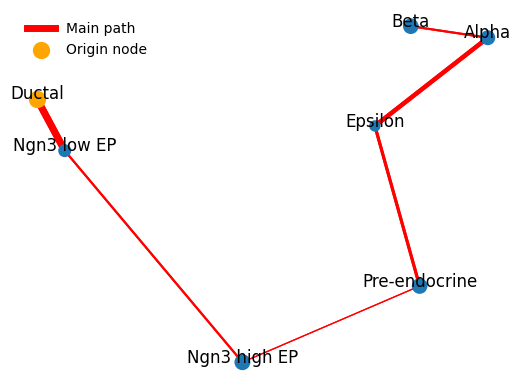


main path: ['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'Epsilon', 'Alpha', 'Beta']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: 16.072 
median: 10.323 
lower quantile: -7.750 
upper quantile: 35.858 
minimum: -202.064 
maximum: 312.487 
No. of positive scores: 692

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:39<00:00,  2.52it/s, cos_s=0.623, cos_u=0.842, mse_s=0.008, mse_u=0.008]


computing velocity graph (using 20/20 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


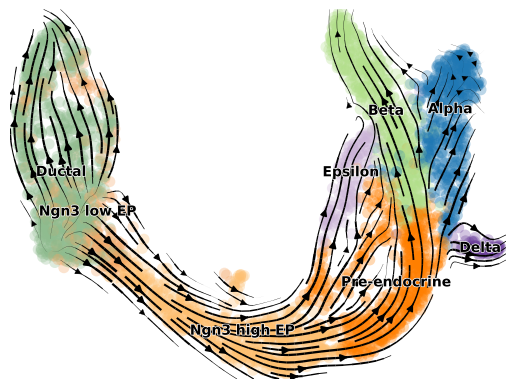

TIVelo:
 CBDir: 0.5257 ICVCoh: 0.6353 
 CBDir2: 0.4850 ICVCoh2: 0.8043 
 TransProbs: 0.4745 VeloCoh: 0.1696


In [7]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


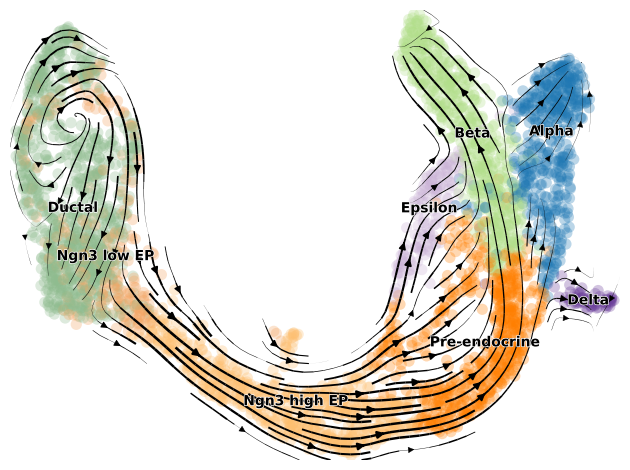

scvelo:
 CBDir: 0.5071 ICVCoh: 0.8699 
 CBDir2: 0.0413 ICVCoh2: 0.8081 
 TransProbs: 0.1732 VeloCoh: 0.0523


In [8]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

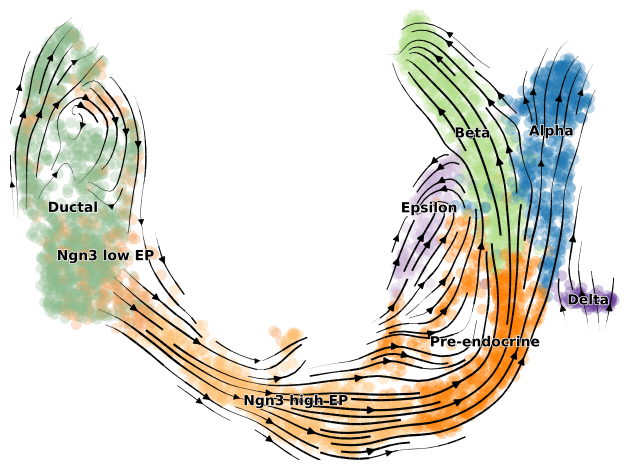

scvelo2:
 CBDir: 0.4430 ICVCoh: 0.8721 
 CBDir2: 0.1783 ICVCoh2: 0.8301 
 TransProbs: 0.2338 VeloCoh: 0.1971


In [9]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

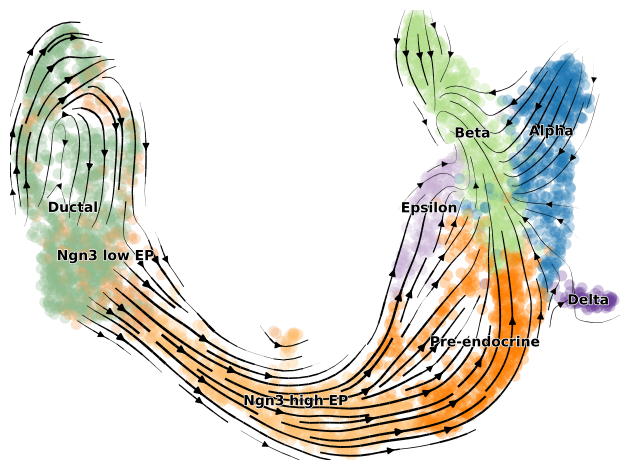

velovi:
 CBDir: 0.5323 ICVCoh: 0.8940 
 CBDir2: 0.1042 ICVCoh2: 0.8271 
 TransProbs: 0.1065 VeloCoh: 0.1731


In [10]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

We have provided a uniform API to test TIVelo and other methods . You can use the following code to test UniTVelo:
> Note: Ensure that you install the UniTVelo dependencies by following the [official instructions](https://unitvelo.readthedocs.io/en/latest/install.html).

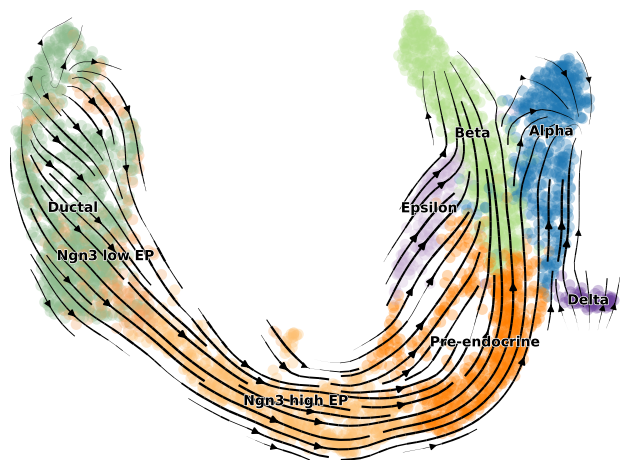

unitvelo:
 CBDir: 0.5096 ICVCoh: 0.9863 
 CBDir2: 0.1389 ICVCoh2: 0.9207 
 TransProbs: 0.1680 VeloCoh: -0.0258


In [11]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

## Run cellDancer

We have provided a uniform API to test TIVelo and other methods . You can use the following code to test CellDancer:
> Note: Ensure that you install the CellDancer dependencies by following the [official cellDancer instructions](https://guangyuwanglab2021.github.io/cellDancer_website/notebooks/installation.html).


computing velocity graph (using 20/20 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


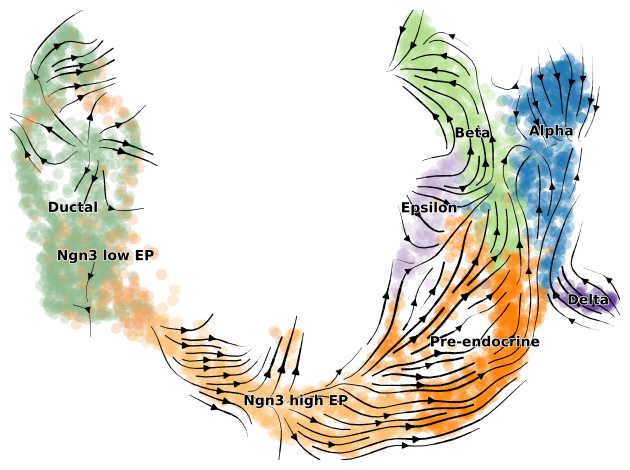

celldancer:
 CBDir: 0.4454 ICVCoh: 0.9548 
 CBDir2: 0.0583 ICVCoh2: 0.6712 
 TransProbs: 0.0479 VeloCoh: -0.2845


In [12]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)